In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset
data = pd.read_csv('real_state.csv',header = None)
data.head(5)

,0,1,2,3,4,5,6,7
0,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,1,2012.917,32,84.87882,10,24.98298,121.54024,37.9
2,2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2
3,3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3
4,4,2013.5,13.3,561.9845,5,24.98746,121.54391,54.8


In [3]:
headers = ["transaction_date", "house_age", "transit_distance", "local_convenience_stores", "latitude", "longitude","price_per_unit"]
# Eliminamos la primer columna ya que no nos sirve
data = data.drop(data.columns[0], axis = 1)
# Damos nombre a las columnas
data.columns = headers
# Eliminamos la primer fila
data = data.drop(0, axis = 0)
data.head(3)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
1,2012.917,32,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3


In [4]:
# Información de nuestros datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   transaction_date          414 non-null    object
 1   house_age                 414 non-null    object
 2   transit_distance          414 non-null    object
 3   local_convenience_stores  414 non-null    object
 4   latitude                  414 non-null    object
 5   longitude                 414 non-null    object
 6   price_per_unit            414 non-null    object
dtypes: object(7)
memory usage: 22.8+ KB


In [5]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors = 'coerce')
# Separo la columna transaction_date de los demás valores
df_sin_fecha = data.drop('transaction_date', axis = 1)
df_fecha = data.iloc[:,:1]
# df_fecha = pd.to_numeric(df_fecha['transaction_date'], errors = 'coerce')
# Convierto los valores del nuevo dataset en valores numéricos

In [6]:
df_fecha['transaction_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 414 entries, 1 to 414
Series name: transaction_date
Non-Null Count  Dtype  
--------------  -----  
414 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [22]:
df_fecha['anio'] = df_fecha['transaction_date'].astype(int)
decimal = (df_fecha['transaction_date'] - df_fecha['anio'])*360

# Mes
mes = decimal / 30
df_fecha['mes'] = mes.astype(int) 
# Día
dia = (mes - df_fecha['mes'].astype(int))*30
df_fecha['dia'] = dia.astype(int)
# Hora
hora = (dia - df_fecha['dia'].astype(int))*24
df_fecha['hora'] = hora.astype(int)
# Minutos
mi = (hora - df_fecha['hora'].astype(int))*60
df_fecha['minutos'] = mi.astype(int) 
# Segundos
seg = (mi - df_fecha['minutos'].astype(int))*60
df_fecha['segundos'] = seg.astype(int)
df_fecha = df_fecha.replace(0, 1)
df_fecha['unidos'] = df_fecha['anio'].astype(
    str)+":"+ df_fecha['mes'].astype(
    str)+":"+df_fecha['dia'].astype(
    str)+":"+ df_fecha['hora'].astype(
    str)+":"+ df_fecha['minutos'].astype(
    str)+":"+ df_fecha['segundos'].astype(str)

In [8]:
from datetime import datetime
time = []
for dates in df_fecha['unidos']:
    fecha_objeto = datetime.strptime(dates, "%Y:%m:%d:%H:%M:%S")
    time.append(fecha_objeto)
df_fecha["unidos"] = time
df_fecha["unidos"]

1     2012-11-01 02:52:47
2     2012-11-01 02:52:47
3     2013-06-29 21:07:12
4     2013-06-01 01:01:01
5     2012-09-29 21:07:12
              ...        
410   2013-01-01 01:01:01
411   2012-08-01 02:52:47
412   2013-03-01 01:01:01
413   2013-01-01 01:01:01
414   2013-06-01 01:01:01
Name: unidos, Length: 414, dtype: datetime64[ns]

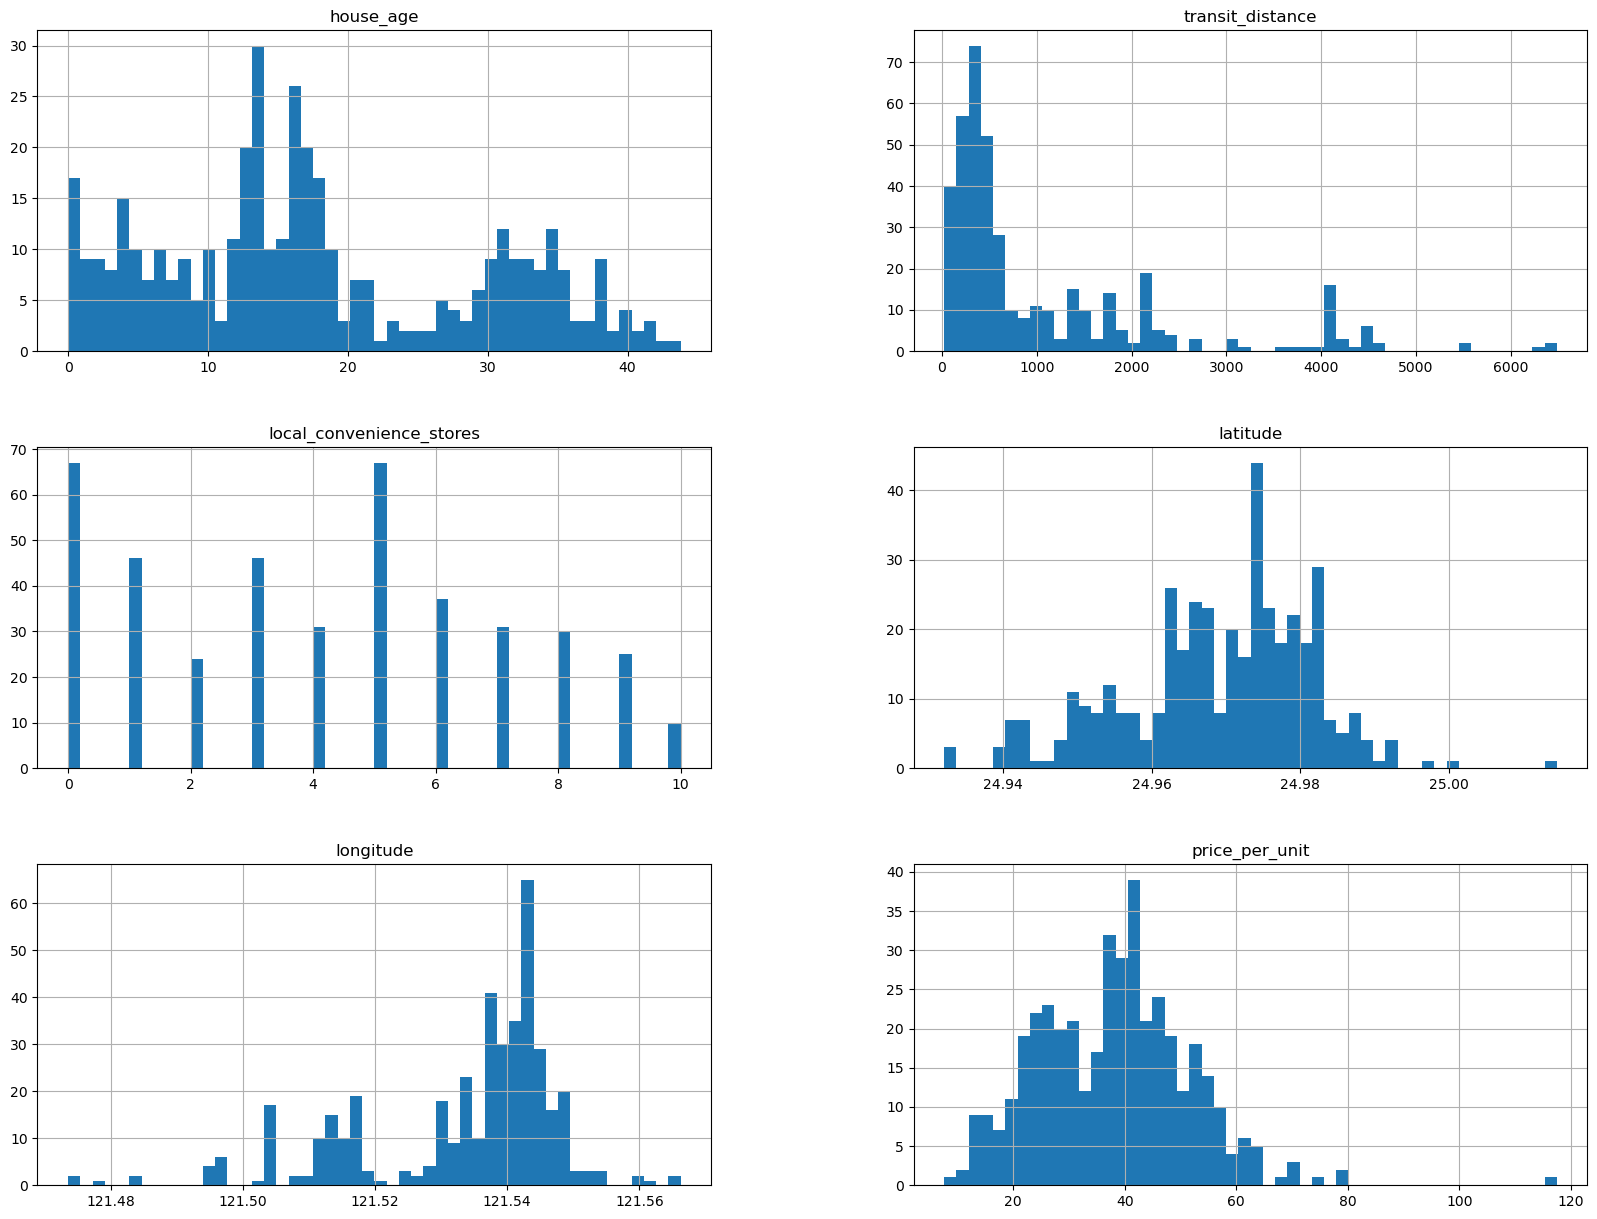

In [9]:
df_sin_fecha.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

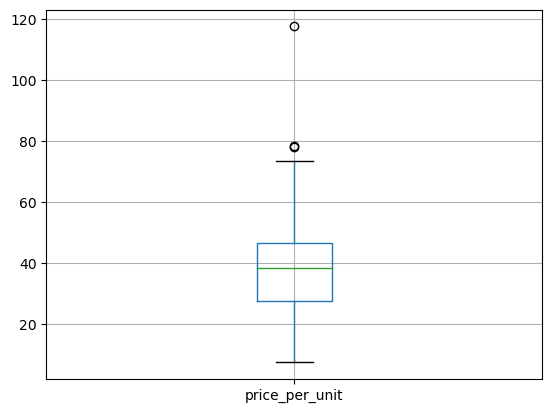

In [10]:
# La columna "price_per_unit" es nuestra variable a predecir
df_sin_fecha.boxplot('price_per_unit')

### Removing Outliers
Para continuar con el análisis tendremos que eliminar los outliers, esto con la finalidad de que no entorpezca al modelo

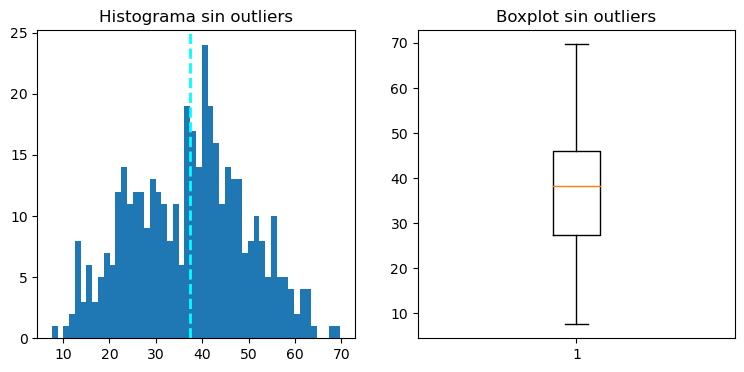

In [11]:
nueva_data = df_sin_fecha[df_sin_fecha['price_per_unit']<70]
p_unit = nueva_data[nueva_data.columns[-1]]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axs[0].hist(p_unit, bins = 50)
axs[0].set_title("Histograma sin outliers")
axs[0].axvline(p_unit.mean(), color='cyan', linestyle='dashed', linewidth=2)
axs[1].boxplot(p_unit)
axs[1].set_title("Boxplot sin outliers")
plt.show()

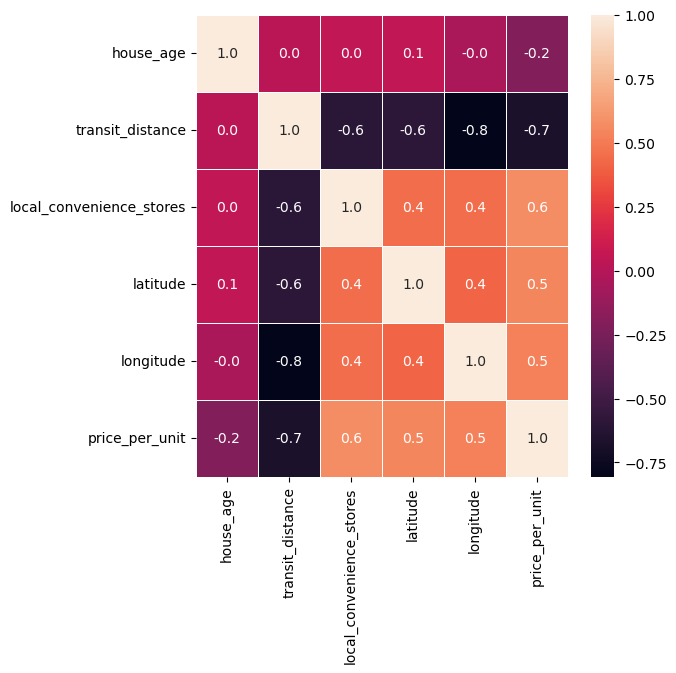

In [12]:
# Mapa de calor para las correlaciones
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_sin_fecha.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

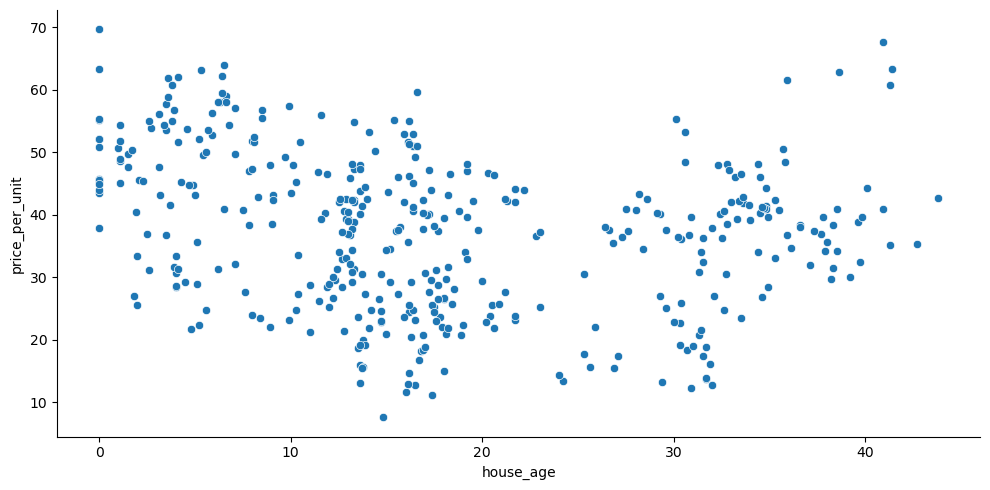

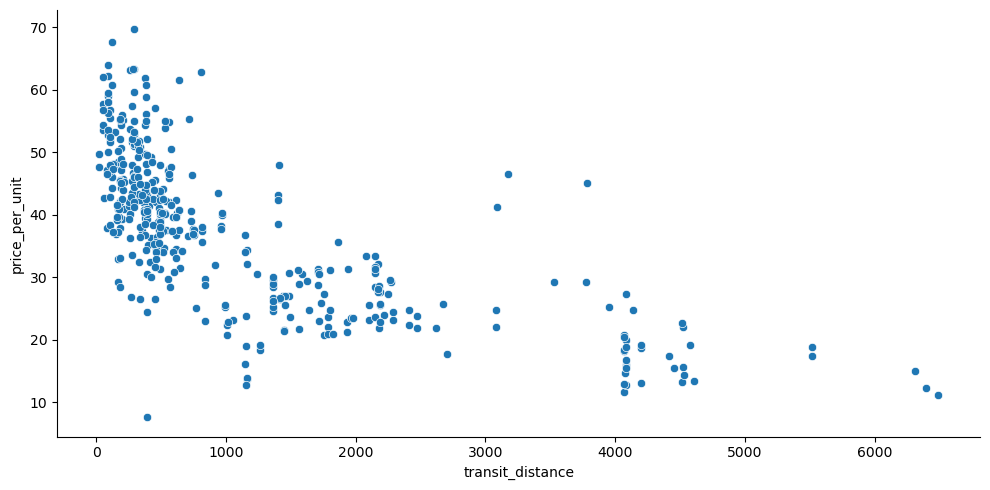

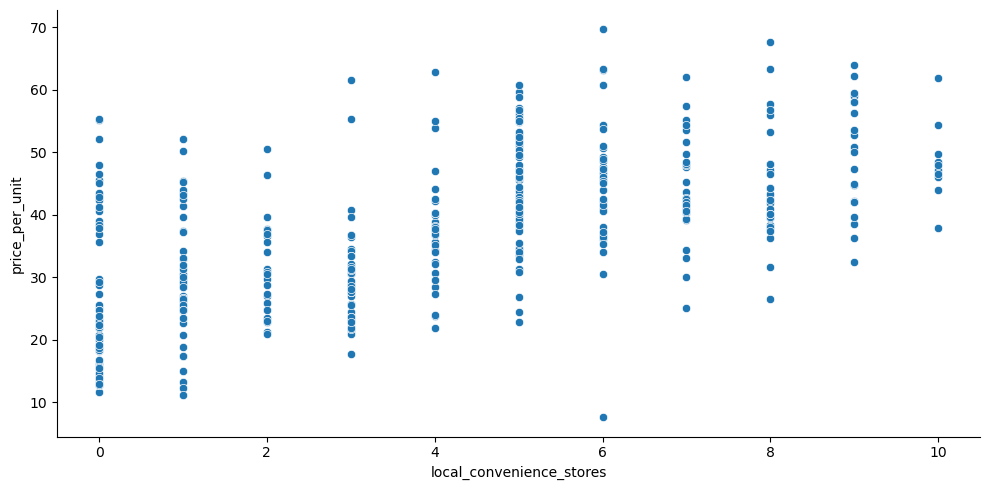

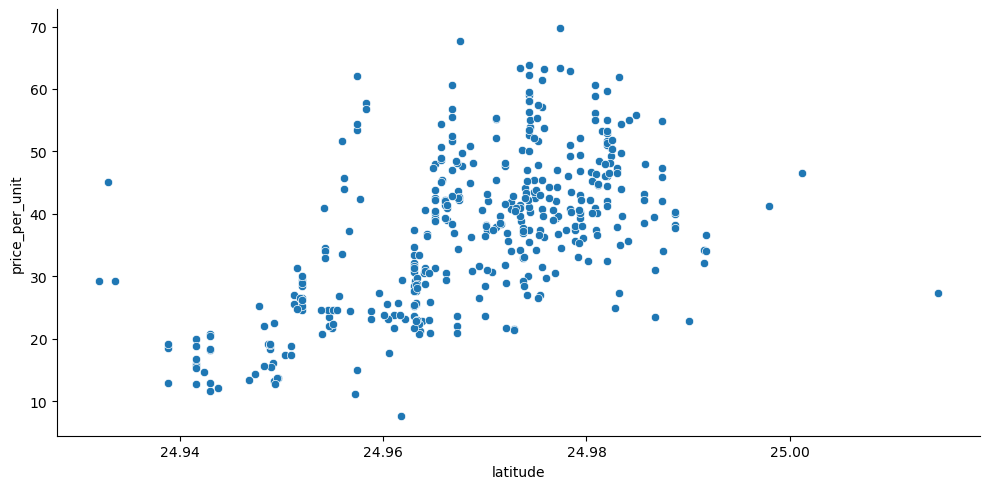

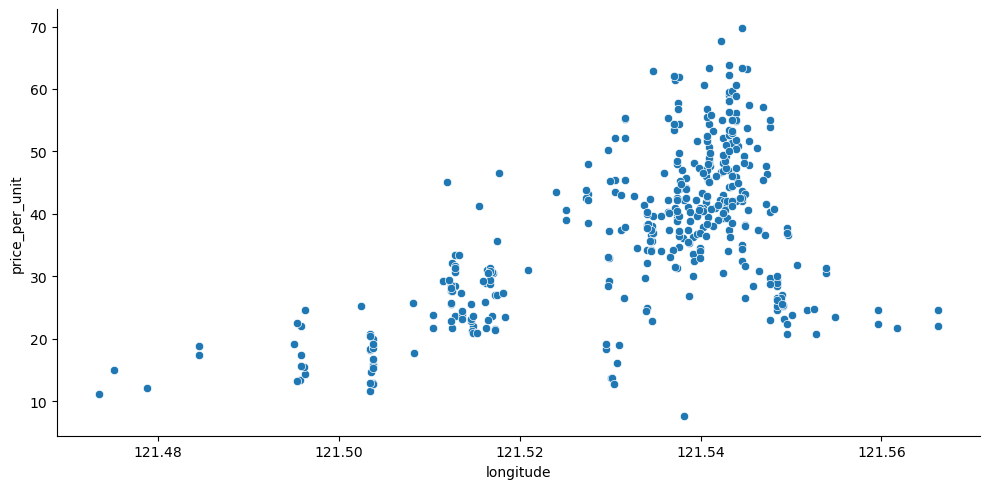

In [13]:
# Scatterplot para observar correlaciones
for col in nueva_data[nueva_data.columns[0:-1]]:
    sns.relplot(data=nueva_data, x=col, y=p_unit, aspect=2)

### Características categóricas
Las columnas que representan nuestras caracteristicas categóricas de nuestros datos son transaction_date y local convenience_stores

C:\Users\Adrián Vázquez\AppData\Local\Temp\ipykernel_4376\3084871726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nueva_data['transaction_date'] = df_fecha['unidos']


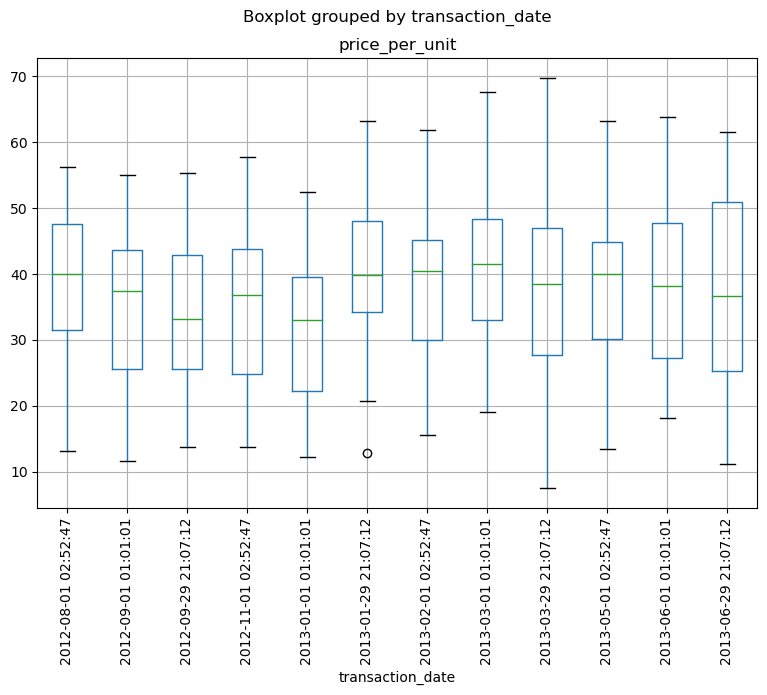

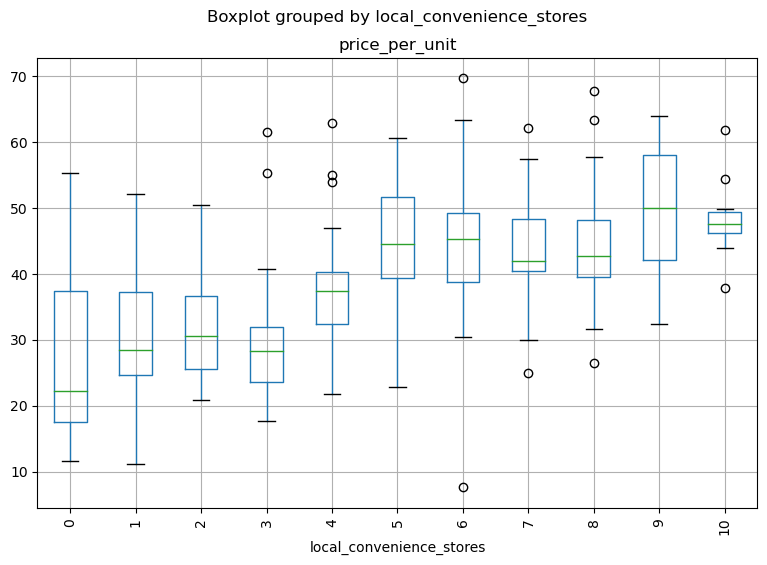

In [14]:
nueva_data['transaction_date'] = df_fecha['unidos']
for col in nueva_data[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    nueva_data.boxplot(column = "price_per_unit", by = col, ax=ax)
    ax.tick_params(axis='x', rotation=90)

In [15]:
# Separación de características
# Se crean dos conjuntos nuevos "X" e "y" para el entrenamiento del modelo
X, y = nueva_data[["house_age", 
                     "transit_distance", 
                     "local_convenience_stores", 
                     "latitude", 
                     "longitude"]].values, nueva_data['price_per_unit'].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
print('Conjunto de Entrenamiento: %d, filas\nConjunto de Prueba: %d filas' % (X_train.shape[0], X_test.shape[0]))

Conjunto de Entrenamiento: 285, filas
Conjunto de Prueba: 123 filas


### Escalamiento y Normalización de los datos
El escalamiento consiste en hacer coincidir la escala de los valores en este caso, los datos de entrenamiento en un rango [0, 1]
La normalización es transformar las características de forma que todas compartan la media y la desviación estandar 

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

In [18]:
# Definimos el preprocesamiento para columnas numéricas (las escalamos)
car_num = [0,1,2,3,4]
trans_num = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combinar los pasos del preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', trans_num, car_num),])

# Crear el pipeline de preprocesamiento y de entrenamiento
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', RandomForestRegressor())])

# Ajistamos el pipeline para entrenar un modelo de regresión lineal sobre el conjunto de entrenamiento
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])])),
                ('regressor', RandomForestRegressor())])


### Evaluar el modelo

Los algoritmos ensamblados trabajan combinando múltiples estimadores para producir un modelo óptimo, ya sea **aplicando una función agregada o una colección de modelos base** (a menudo es referida como *bagging*) o construyendo una **secuencia de modelos que se complementan entre si para mejorar le rendimiento predictivo** (lo que se conoce como refuerzo *boosting*)

**RandomForestRegressor** aplica una función de promedio de varios árboles de decision para obtener un mejor modelo general

MSE:  37.91375482199643
RMSE:  6.157414621575879
R2:  0.6764802175699309


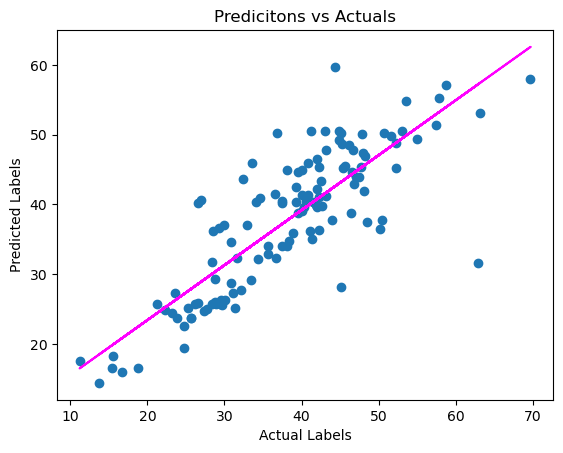

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
predictions = model.predict(X_test)

# Mostramos métricas
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)

# Plot de predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicitons vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'magenta')
plt.show()

### Using Gradient Boosting
Para una mejor estimación se hará la prueba intentando un algoritmo *boosting ensemble*. Se usará un estimador Gradient Boosting, el cual, como un algoritmo Random Forest construye múltiples árboles, pero en lugar de construirlos independientemente y tomanto el resultado promedio, cada árbol es construido sobre la salida del anterior en un intento de incrementar la reducción de la *pérdida* (error) en el modelo

GradientBoostingRegressor() 

MSE:  37.94962454081692
RMSE:  6.160326658612911
R2:  0.6761741396390291


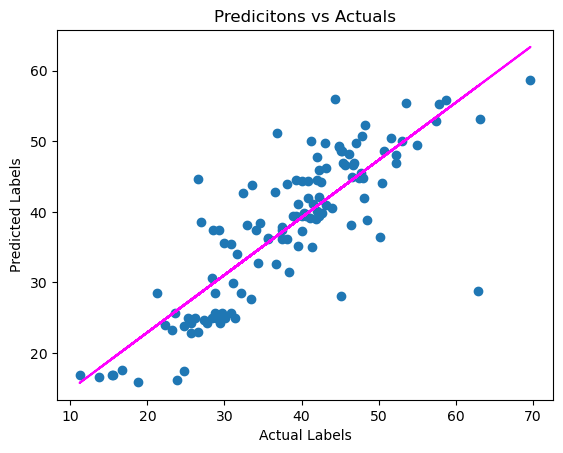

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Ajustamos un primer modelo con GBR
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, "\n")

# Se evalúa el modelo usando el conjunto de prueba
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)

# Ploteo
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicitons vs Actuals')
# Linea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'magenta')
plt.show()

In [21]:
import joblib

# Guardado de modelo
filename = './modelo_final.pkl'
joblib.dump(model, filename)

modelo_final = joblib.load(filename)

# Conjunto de características para cada nueva transacción "imaginaria" que no incluye la fecha de transacción
X_new = np.array([[16.2, 289.3248,5, 24.98203, 121.65348],
                  [13.6, 4082.015, 0, 24.94155, 121.5038]])
# Uso del modelo con los nuevos datos
results = modelo_final.predict(X_new)
print('Predicciones')
for prediction in results:
    print(round(prediction, 2))

Predicciones
48.66
16.9
